In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno


In [ ]:
df = pd.read_csv('dataset1.csv')
df.head(10)

,data,responsável,temperatura
0,sábado - 01/04/2023 00:00,Fábio,19.59
1,sábado - 01/04/2023 00:15,Fábio,19.10
2,sábado - 01/04/2023 00:30,Fábio,19.14
3,sábado - 01/04/2023 00:45,Fábio,18.55
4,sábado - 01/04/2023 01:00,Fábio,NaN
5,sábado - 01/04/2023 01:15,Fábio,18.19
6,sábado - 01/04/2023 01:30,Fábio,18.17
7,sábado - 01/04/2023 01:45,Fábio,17.79
8,sábado - 01/04/2023 02:00,Fábio,17.86
9,sábado - 01/04/2023 02:15,Fábio,17.49


In [ ]:
df.info

<bound method DataFrame.info of                             data responsável  temperatura
0      sábado - 01/04/2023 00:00       Fábio        19.59
1      sábado - 01/04/2023 00:15       Fábio        19.10
2      sábado - 01/04/2023 00:30       Fábio        19.14
3      sábado - 01/04/2023 00:45       Fábio        18.55
4      sábado - 01/04/2023 01:00       Fábio          NaN
...                          ...         ...          ...
2875  domingo - 30/04/2023 22:45     Letícia        20.13
2876  domingo - 30/04/2023 23:00     Letícia        19.62
2877  domingo - 30/04/2023 23:15     Letícia        19.43
2878  domingo - 30/04/2023 23:30     Letícia        19.25
2879  domingo - 30/04/2023 23:45     Letícia        19.24

[2880 rows x 3 columns]>

Dividir a colona "data" em dia da semana hora e a data mesmo para facilitar a visualização.

In [ ]:
df[['dia_semana','-', 'data_mes', 'hora']] = df['data'].str.split(' ', expand=True)
df = df.drop(['data'], axis=1)

In [ ]:
df = df.drop(['-'], axis=1)
df

,responsável,temperatura,dia_semana,data_mes,hora
0,Fábio,19.59,sábado,01/04/2023,00:00
1,Fábio,19.10,sábado,01/04/2023,00:15
2,Fábio,19.14,sábado,01/04/2023,00:30
3,Fábio,18.55,sábado,01/04/2023,00:45
4,Fábio,NaN,sábado,01/04/2023,01:00
...,...,...,...,...,...
2875,Letícia,20.13,domingo,30/04/2023,22:45
2876,Letícia,19.62,domingo,30/04/2023,23:00
2877,Letícia,19.43,domingo,30/04/2023,23:15
2878,Letícia,19.25,domingo,30/04/2023,23:30


In [ ]:
df=df[['responsável', 'dia_semana', 'data_mes', 'hora','temperatura']]
df = df.rename(columns={'data_mes': 'data'})
df

,responsável,dia_semana,data,hora,temperatura
0,Fábio,sábado,01/04/2023,00:00,19.59
1,Fábio,sábado,01/04/2023,00:15,19.10
2,Fábio,sábado,01/04/2023,00:30,19.14
3,Fábio,sábado,01/04/2023,00:45,18.55
4,Fábio,sábado,01/04/2023,01:00,NaN
...,...,...,...,...,...
2875,Letícia,domingo,30/04/2023,22:45,20.13
2876,Letícia,domingo,30/04/2023,23:00,19.62
2877,Letícia,domingo,30/04/2023,23:15,19.43
2878,Letícia,domingo,30/04/2023,23:30,19.25


#Ex A:

In [ ]:
df.data.unique()

array(['01/04/2023', '02/04/2023', '03/04/2023', '04/04/2023',
       '05/04/2023', '06/04/2023', '07/04/2023', '08/04/2023',
       '09/04/2023', '10/04/2023', '11/04/2023', '12/04/2023',
       '13/04/2023', '14/04/2023', '15/04/2023', '16/04/2023',
       '17/04/2023', '18/04/2023', '19/04/2023', '20/04/2023',
       '21/04/2023', '22/04/2023', '23/04/2023', '24/04/2023',
       '25/04/2023', '26/04/2023', '27/04/2023', '28/04/2023',
       '29/04/2023', '30/04/2023'], dtype=object)

Transformar tipo em datetime

In [ ]:
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y').values.astype('datetime64')
df['data']

0      2023-04-01
1      2023-04-01
2      2023-04-01
3      2023-04-01
4      2023-04-01
          ...    
2875   2023-04-30
2876   2023-04-30
2877   2023-04-30
2878   2023-04-30
2879   2023-04-30
Name: data, Length: 2880, dtype: datetime64[ns]

In [ ]:
df

,responsável,dia_semana,data,hora,temperatura
0,Fábio,sábado,2023-04-01,00:00,19.59
1,Fábio,sábado,2023-04-01,00:15,19.10
2,Fábio,sábado,2023-04-01,00:30,19.14
3,Fábio,sábado,2023-04-01,00:45,18.55
4,Fábio,sábado,2023-04-01,01:00,NaN
...,...,...,...,...,...
2875,Letícia,domingo,2023-04-30,22:45,20.13
2876,Letícia,domingo,2023-04-30,23:00,19.62
2877,Letícia,domingo,2023-04-30,23:15,19.43
2878,Letícia,domingo,2023-04-30,23:30,19.25


#Ex B:

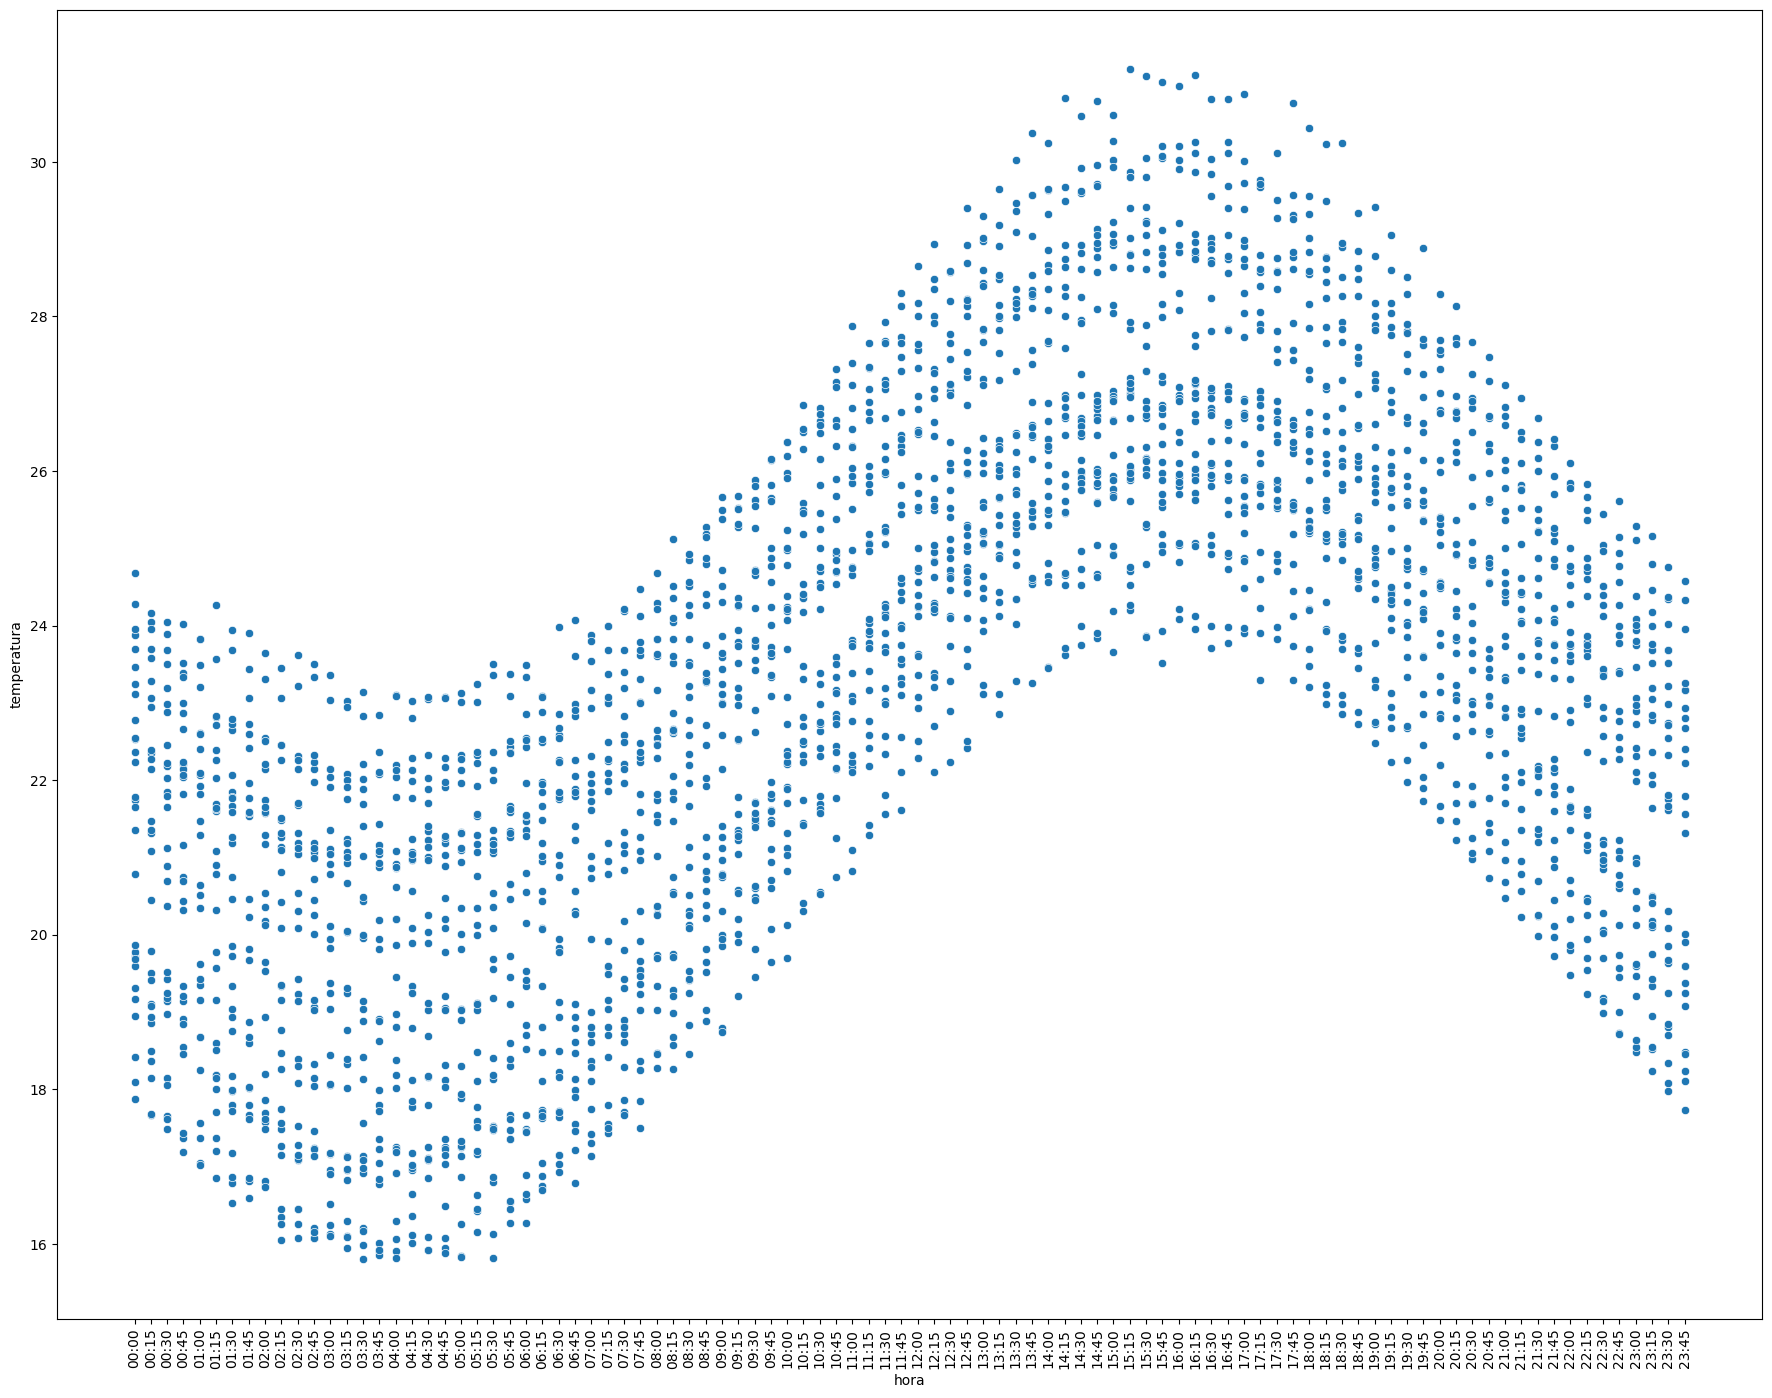

In [ ]:
plt.figure(figsize=(22,17))
sns.scatterplot(x='hora', y='temperatura', data=df)
plt.xticks(rotation=90)
plt.show()

Apesar da grande variação, não há nenhum grande outlier, e também há um claro padrão, que poderemos melhor observar em outro tipo de gráfico.

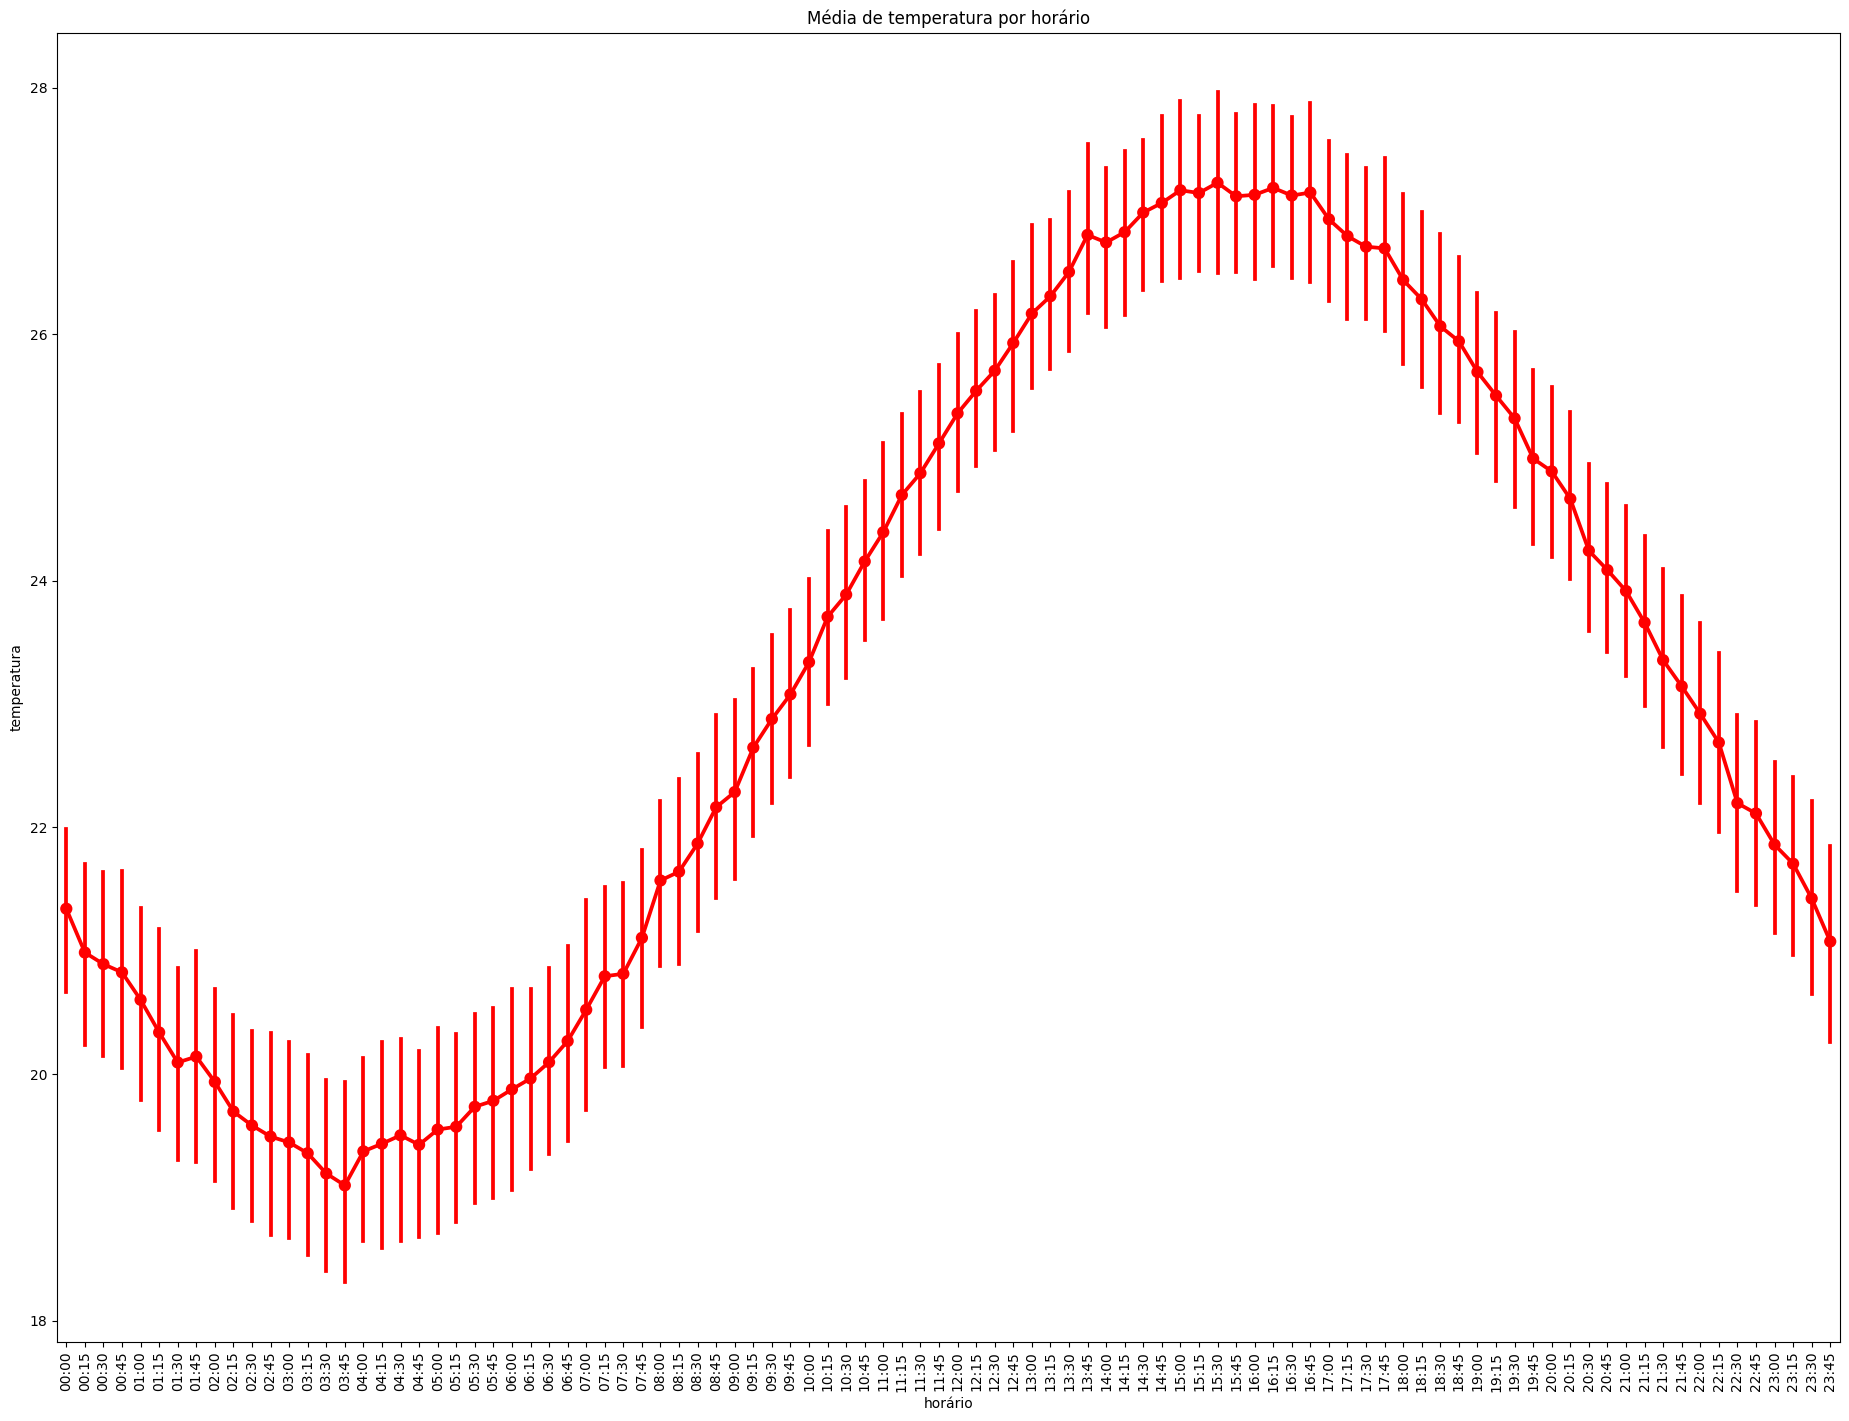

In [ ]:
plt.figure(figsize=(23,17))
sns.pointplot(x='hora', y='temperatura', data=df, color='red')
plt.xlabel("horário")
plt.title('Média de temperatura por horário')
plt.xticks(rotation=90)
plt.show()

Observando a linha horizontal, que representa a média de temperatura em cada horário medido ao longo dos 30 dias, podemos observar melhor o padrão de comportamento da variação pelo horário do dia, entre 00:00h e 04:00h ela cai, começa a aumentar alcançando o pico por volta das 16:00h, voltando a cair durante o resto do dia.

Podemos usar outra abordagem e olhar a média de temperatura por dia, assim sendo possível ver seu comportamente durante o mês.

In [ ]:
df_mediatemp=df.groupby(df["data"].dt.day)['temperatura'].mean().round(2).reset_index()
df_mediatemp

,data,temperatura
0,1,21.86
1,2,21.92
2,3,23.01
3,4,24.93
4,5,23.04
5,6,24.92
6,7,24.95
7,8,23.87
8,9,23.97
9,10,23.95


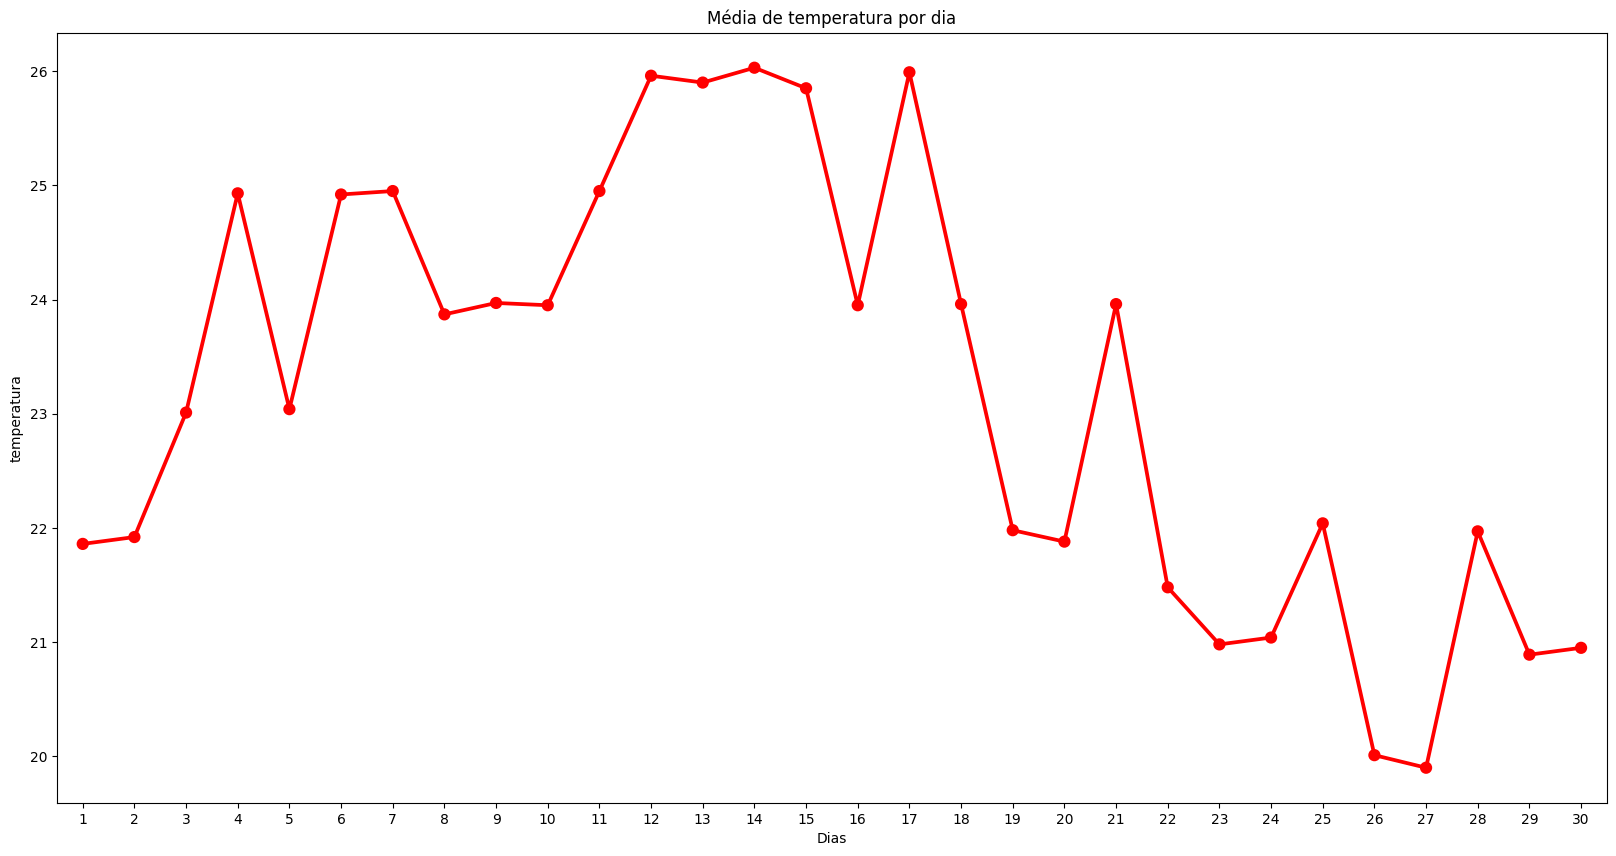

In [ ]:
plt.figure(figsize=(20,10))
sns.pointplot(x='data', y='temperatura', data=df_mediatemp, color='red')
plt.xlabel("Dias")
plt.title('Média de temperatura por dia')
plt.show()  #melhorar estética dos graficos

O comportamento não se mostra muito padronizado, não há um claro declínio ou ascenção linear ao longo do mês, a média diária mostra uma baixa variância, apenas por volta de 6°C. Apesar disso, é possível observar médias mais baixas a partir do dia 22 até o final do mês, e médias mais elevadas entre o dia 12 e o 17.

# Ex C:

In [ ]:
#ex c:
df['responsável'].unique()

array(['Fábio', 'Fernando', 'Júlia', 'Letícia', 'Marcela', 'Rafael'],
      dtype=object)

In [ ]:
df_fabio = df[df["responsável"] == "Fábio"]
print(len(df_fabio))
df_fabio.head(10)


624


,responsável,dia_semana,data,hora,temperatura
0,Fábio,sábado,2023-04-01,00:00,19.59
1,Fábio,sábado,2023-04-01,00:15,19.10
2,Fábio,sábado,2023-04-01,00:30,19.14
3,Fábio,sábado,2023-04-01,00:45,18.55
4,Fábio,sábado,2023-04-01,01:00,NaN
5,Fábio,sábado,2023-04-01,01:15,18.19
6,Fábio,sábado,2023-04-01,01:30,18.17
7,Fábio,sábado,2023-04-01,01:45,17.79
8,Fábio,sábado,2023-04-01,02:00,17.86
9,Fábio,sábado,2023-04-01,02:15,17.49


In [ ]:
df_fernando = df[df["responsável"] == "Fernando"]
print(len(df_fernando))
df_fernando.head(10)

624


,responsável,dia_semana,data,hora,temperatura
48,Fernando,sábado,2023-04-01,12:00,25.00
49,Fernando,sábado,2023-04-01,12:15,24.84
50,Fernando,sábado,2023-04-01,12:30,25.52
51,Fernando,sábado,2023-04-01,12:45,25.30
52,Fernando,sábado,2023-04-01,13:00,25.60
53,Fernando,sábado,2023-04-01,13:15,25.93
54,Fernando,sábado,2023-04-01,13:30,26.03
55,Fernando,sábado,2023-04-01,13:45,26.44
56,Fernando,sábado,2023-04-01,14:00,26.42
57,Fernando,sábado,2023-04-01,14:15,26.71


In [ ]:
df_julia = df[df["responsável"] == "Júlia"]
print(len(df_julia))
df_julia.head(10)

624


,responsável,dia_semana,data,hora,temperatura
96,Júlia,domingo,2023-04-02,00:00,19.72
97,Júlia,domingo,2023-04-02,00:15,19.79
98,Júlia,domingo,2023-04-02,00:30,19.42
99,Júlia,domingo,2023-04-02,00:45,19.14
100,Júlia,domingo,2023-04-02,01:00,19.35
101,Júlia,domingo,2023-04-02,01:15,19.16
102,Júlia,domingo,2023-04-02,01:30,19.04
103,Júlia,domingo,2023-04-02,01:45,18.60
104,Júlia,domingo,2023-04-02,02:00,18.20
105,Júlia,domingo,2023-04-02,02:15,18.47


In [ ]:
df_leticia = df[df["responsável"] == "Letícia"]
print(len(df_leticia))
df_leticia.head(10)

496


,responsável,dia_semana,data,hora,temperatura
144,Letícia,domingo,2023-04-02,12:00,24.12
145,Letícia,domingo,2023-04-02,12:15,24.26
146,Letícia,domingo,2023-04-02,12:30,24.72
147,Letícia,domingo,2023-04-02,12:45,24.60
148,Letícia,domingo,2023-04-02,13:00,25.06
149,Letícia,domingo,2023-04-02,13:15,25.04
150,Letícia,domingo,2023-04-02,13:30,25.43
151,Letícia,domingo,2023-04-02,13:45,NaN
152,Letícia,domingo,2023-04-02,14:00,25.87
153,Letícia,domingo,2023-04-02,14:15,25.46


In [ ]:
df_marcela = df[df["responsável"] == "Marcela"]
print(len(df_marcela))
df_marcela .head(10)

256


,responsável,dia_semana,data,hora,temperatura
320,Marcela,terça,2023-04-04,08:00,23.16
321,Marcela,terça,2023-04-04,08:15,23.51
322,Marcela,terça,2023-04-04,08:30,23.53
323,Marcela,terça,2023-04-04,08:45,23.75
324,Marcela,terça,2023-04-04,09:00,23.86
325,Marcela,terça,2023-04-04,09:15,23.94
326,Marcela,terça,2023-04-04,09:30,24.72
327,Marcela,terça,2023-04-04,09:45,24.56
328,Marcela,terça,2023-04-04,10:00,24.98
329,Marcela,terça,2023-04-04,10:15,25.59


In [ ]:
df_rafael = df[df["responsável"] == "Rafael"]
print(len(df_rafael))
df_rafael.head(10)

256


,responsável,dia_semana,data,hora,temperatura
352,Rafael,terça,2023-04-04,16:00,NaN
353,Rafael,terça,2023-04-04,16:15,28.81
354,Rafael,terça,2023-04-04,16:30,29.02
355,Rafael,terça,2023-04-04,16:45,28.75
356,Rafael,terça,2023-04-04,17:00,28.91
357,Rafael,terça,2023-04-04,17:15,28.40
358,Rafael,terça,2023-04-04,17:30,28.59
359,Rafael,terça,2023-04-04,17:45,28.77
360,Rafael,terça,2023-04-04,18:00,28.55
361,Rafael,terça,2023-04-04,18:15,28.24


Nenhuma estranheza aparente nos dados superficiais dos estudantes, há apenas uma diferença de quantidade coletas.


In [ ]:
#media de diferenças:
dif_fabio=df_fabio['temperatura'].diff()
dif_fabio.abs().mean()

0.3145111492281303

In [ ]:
dif_fernando=df_fernando['temperatura'].diff()
dif_fernando.abs().mean()

0.3486195826645264

In [ ]:
dif_julia=df_julia['temperatura'].diff()
dif_julia.abs().mean()

0.38405172413793104

In [ ]:
dif_leticia=df_leticia['temperatura'].diff()
dif_leticia.abs().mean()

0.3093736501079914

In [ ]:
dif_marcela=df_marcela['temperatura'].diff()
dif_marcela.abs().mean()

0.4764830508474576

In [ ]:
dif_rafael=df_rafael['temperatura'].diff()
dif_rafael.abs().mean()

0.38542735042735043

A média de variação absoluta de marcela é um pouco maior, porém não é nenhuma diferença absurda a ser questionada.

Procurando nos gráficos de medição deles:

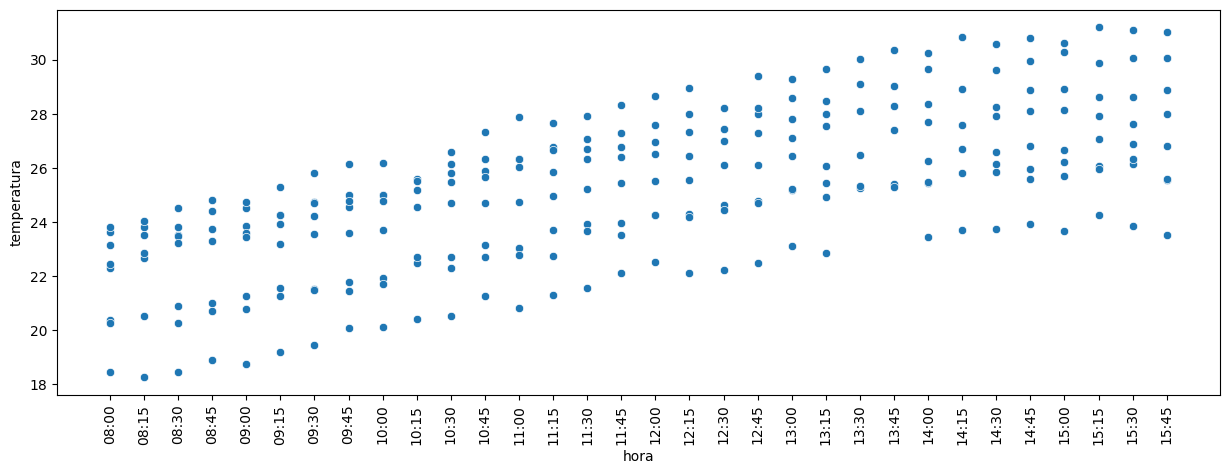

In [ ]:
plt.figure(figsize=(15,5))

sns.scatterplot(x='hora', y='temperatura', data=df_marcela)
plt.xticks(rotation = 90)
plt.show()

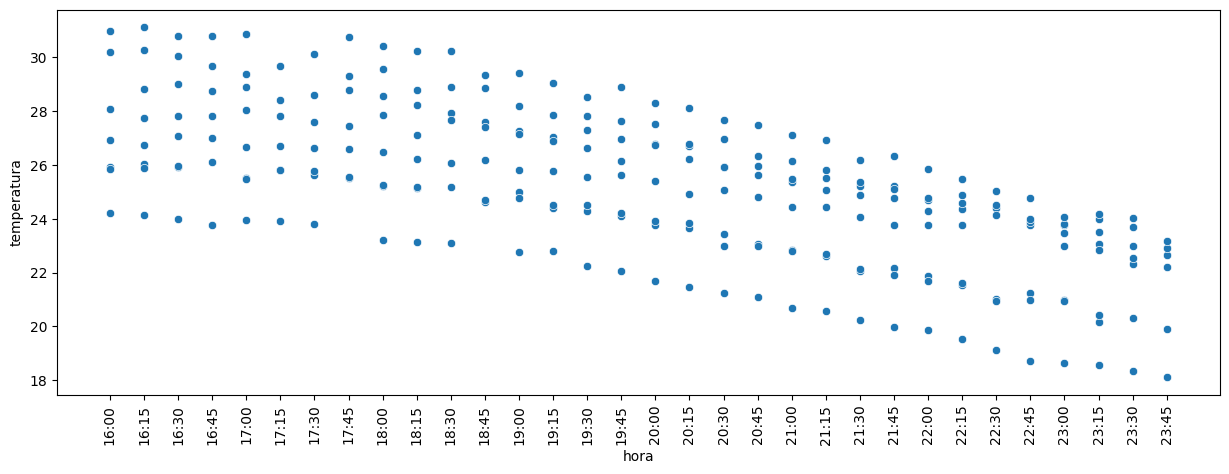

In [ ]:
plt.figure(figsize=(15,5))

sns.scatterplot(x='hora', y='temperatura', data=df_rafael)
plt.xticks(rotation = 90)
plt.show()

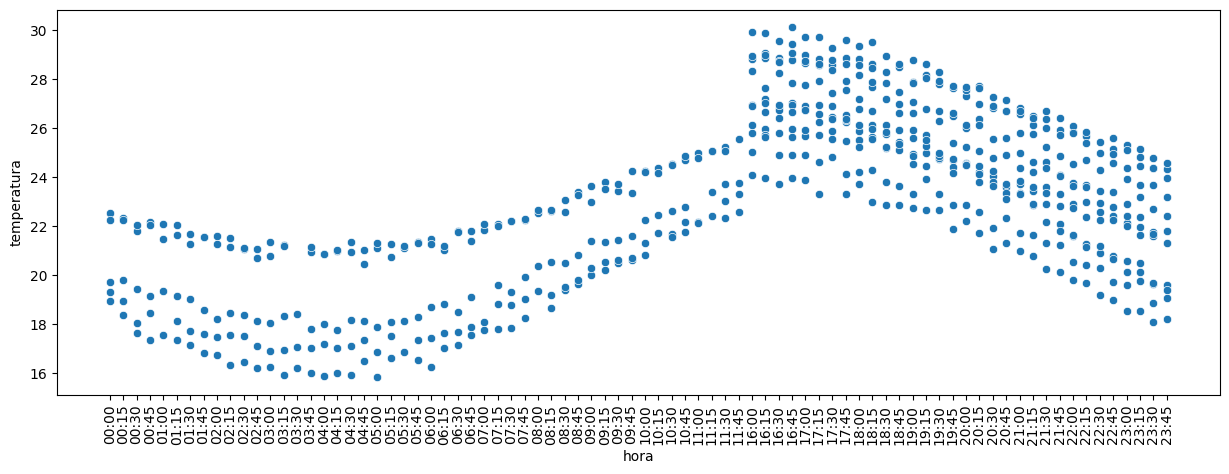

In [ ]:
plt.figure(figsize=(15,5))

sns.scatterplot(x='hora', y='temperatura', data=df_julia)
plt.xticks(rotation = 90)
plt.show()

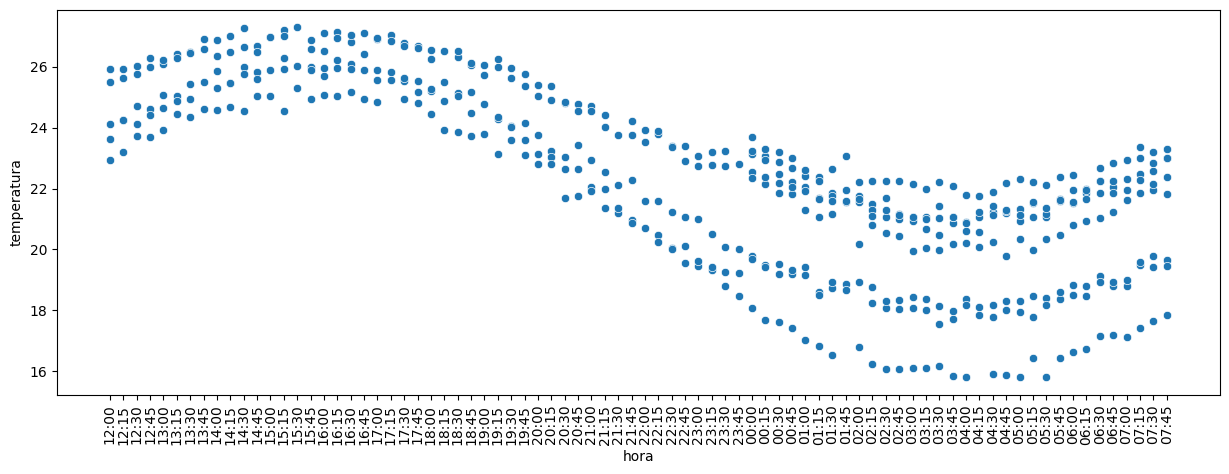

In [ ]:
plt.figure(figsize=(15,5))

sns.scatterplot(x='hora', y='temperatura', data=df_leticia)
plt.xticks(rotation = 90)
plt.show()

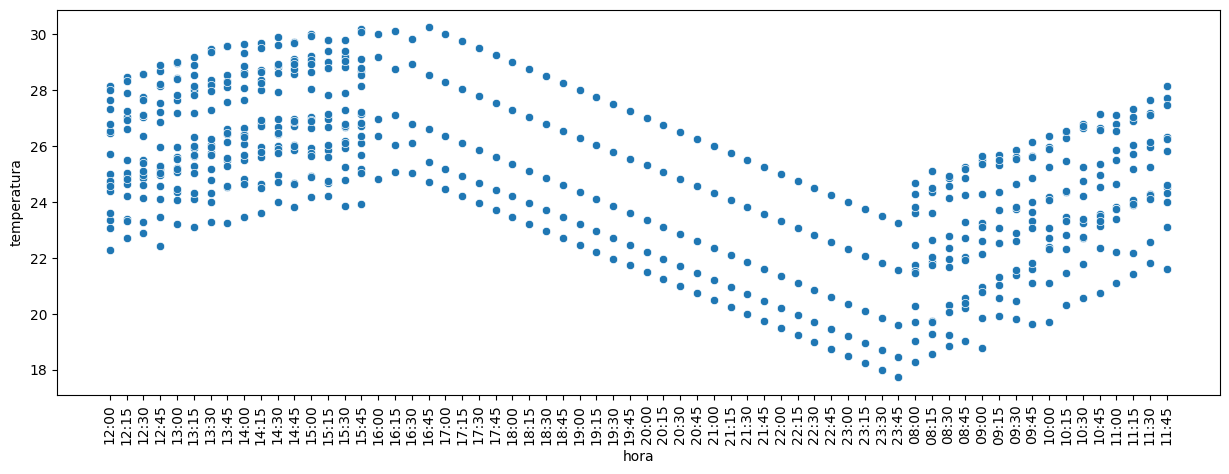

In [ ]:
plt.figure(figsize=(15,5))

sns.scatterplot(x='hora', y='temperatura', data=df_fernando)
plt.xticks(rotation = 90)
plt.show()

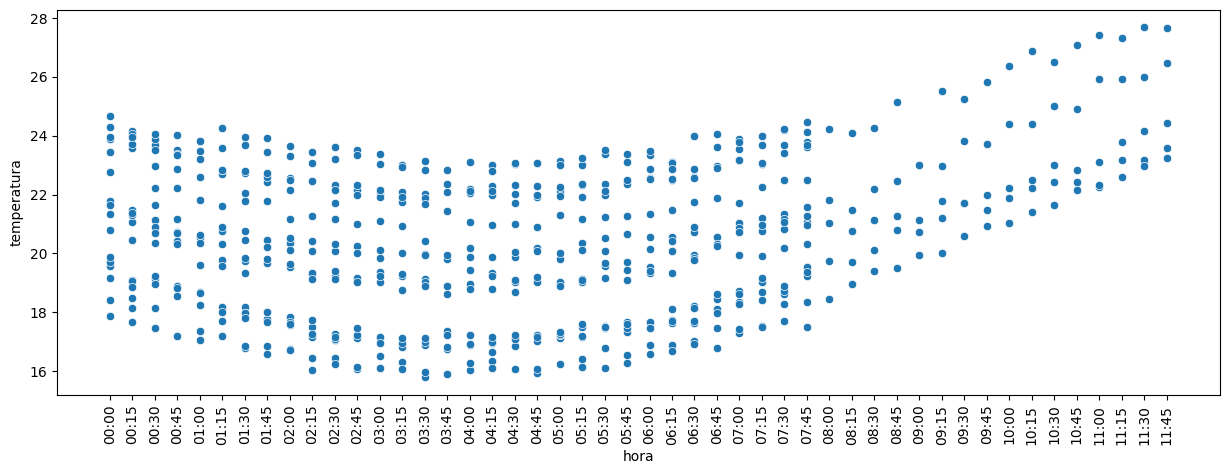

In [ ]:
plt.figure(figsize=(15,5))

sns.scatterplot(x='hora', y='temperatura', data=df_fabio)
plt.xticks(rotation = 90)
plt.show()

O gráfico de Fernando apresenta um estranho padrão muito linear entre 16:45 e 23:45, linearidade exclusiva dele.

In [ ]:
df_fernando['hora'].unique()

array(['12:00', '12:15', '12:30', '12:45', '13:00', '13:15', '13:30',
       '13:45', '14:00', '14:15', '14:30', '14:45', '15:00', '15:15',
       '15:30', '15:45', '16:00', '16:15', '16:30', '16:45', '17:00',
       '17:15', '17:30', '17:45', '18:00', '18:15', '18:30', '18:45',
       '19:00', '19:15', '19:30', '19:45', '20:00', '20:15', '20:30',
       '20:45', '21:00', '21:15', '21:30', '21:45', '22:00', '22:15',
       '22:30', '22:45', '23:00', '23:15', '23:30', '23:45', '08:00',
       '08:15', '08:30', '08:45', '09:00', '09:15', '09:30', '09:45',
       '10:00', '10:15', '10:30', '10:45', '11:00', '11:15', '11:30',
       '11:45'], dtype=object)

In [ ]:
horas_impostoras=['16:45', '17:00',
       '17:15', '17:30', '17:45', '18:00', '18:15', '18:30', '18:45',
       '19:00', '19:15', '19:30', '19:45', '20:00', '20:15', '20:30',
       '20:45', '21:00', '21:15', '21:30', '21:45', '22:00', '22:15',
       '22:30', '22:45', '23:00', '23:15', '23:30', '23:45',]
df_hora_fernando = df_fernando[df_fernando['hora'].isin(horas_impostoras)]

In [ ]:
df_hora_fernando.head(10)

,responsável,dia_semana,data,hora,temperatura
67,Fernando,sábado,2023-04-01,16:45,26.60
68,Fernando,sábado,2023-04-01,17:00,26.35
69,Fernando,sábado,2023-04-01,17:15,26.10
70,Fernando,sábado,2023-04-01,17:30,25.85
71,Fernando,sábado,2023-04-01,17:45,25.60
72,Fernando,sábado,2023-04-01,18:00,25.35
73,Fernando,sábado,2023-04-01,18:15,25.10
74,Fernando,sábado,2023-04-01,18:30,24.85
75,Fernando,sábado,2023-04-01,18:45,24.60
76,Fernando,sábado,2023-04-01,19:00,24.35


In [ ]:
dif_hora_fernando=df_hora_fernando['temperatura'].diff().reset_index()
dif_hora_fernando

,index,temperatura
0,67,NaN
1,68,-0.25
2,69,-0.25
3,70,-0.25
4,71,-0.25
...,...,...
140,2779,-0.25
141,2780,-0.25
142,2781,-0.25
143,2782,-0.25


In [ ]:
dif_hora_fernando.groupby("temperatura").count()

,index
temperatura,
-0.25,140
1.47,1
7.72,1
8.70,1
8.96,1


As grandes diferenças são dados falsos, pois representam dias diferentes, elas estão calculando a diferença entre a temperatura das 23:45 e das 16:45 de outro dia, ou seja podem ser descartadas. Resta assim apenas medidas iguais de -0.25 graus, é possível concluir que Fernando é o impostor, entre 16:45 e 23:45, nos dias em que ele tinha obrigação de medir, ele não media nada, apenas seguia um padrão de decaimento da temperatura.

#Ex D:

<Axes: >

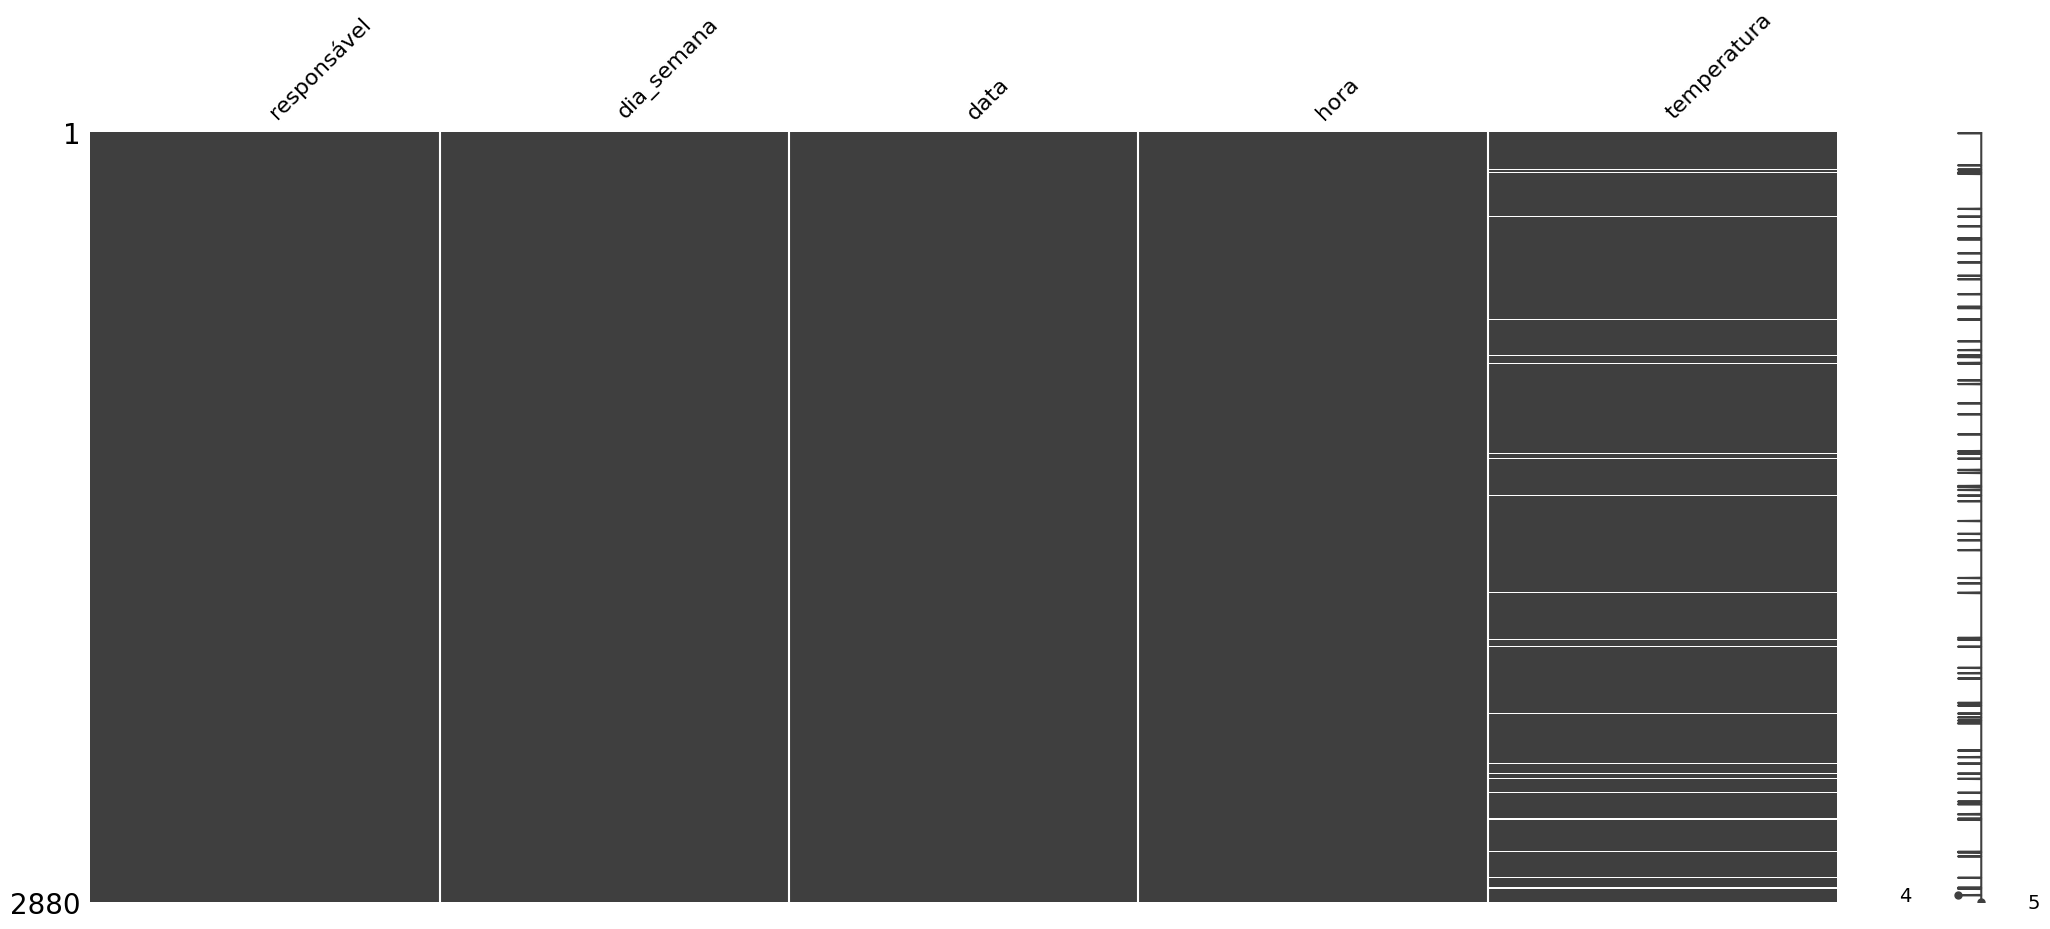

In [ ]:
msno.matrix(df)

In [ ]:
df['temperatura'] = df['temperatura'].ffill()
df.head(6)

,responsável,dia_semana,data,hora,temperatura
0,Fábio,sábado,2023-04-01,00:00,19.59
1,Fábio,sábado,2023-04-01,00:15,19.10
2,Fábio,sábado,2023-04-01,00:30,19.14
3,Fábio,sábado,2023-04-01,00:45,18.55
4,Fábio,sábado,2023-04-01,01:00,18.55
5,Fábio,sábado,2023-04-01,01:15,18.19


É possível verificar que não há muitos dados faltantes, assim pode-se usar algum método simples para preenchê-los. Não podemos usar as técnicas mais comuns, como utilizar média ou moda, pois isso quebreria muito o padrão das mudanças de temperatura a cada 15 minutos. O jeito simples escolhido para possivelmente corrigir as faltas sem comprometer a lógica dos dados é o de apenas copiar a temperatura anterior ao dado nulo.

# Ex E:

In [ ]:
df_quarta = df[df["dia_semana"] == "quarta"]
df_quarta.head()

,responsável,dia_semana,data,hora,temperatura
384,Fábio,quarta,2023-04-05,00:00,21.78
385,Fábio,quarta,2023-04-05,00:15,21.32
386,Fábio,quarta,2023-04-05,00:30,21.65
387,Fábio,quarta,2023-04-05,00:45,20.74
388,Fábio,quarta,2023-04-05,01:00,20.64


In [ ]:
min_valor = df_quarta['temperatura'].min()
df_quarta[df_quarta['temperatura']==min_valor]

,responsável,dia_semana,data,hora,temperatura
2414,Fábio,quarta,2023-04-26,03:30,15.8


A quarta-feira com menor temperatura mínima segundo as medições dos alunos foi em 26/04/2023, apresentando a temperatura de 15,8°C

#Ex F:

In [ ]:
df_maxtemp=df.groupby(df["data"].dt.day)['temperatura'].max().reset_index()
df_maxtemp

,data,temperatura
0,1,27.30
1,2,26.28
2,3,26.39
3,4,29.02
4,5,26.23
5,6,30.27
6,7,28.58
7,8,29.40
8,9,27.29
9,10,27.04


In [ ]:
df_mintemp=df.groupby(df["data"].dt.day)['temperatura'].min().reset_index()
df_mintemp

,data,temperatura
0,1,16.91
1,2,17.77
2,3,19.81
3,4,20.57
4,5,19.94
5,6,19.78
6,7,21.71
7,8,18.91
8,9,20.47
9,10,20.44


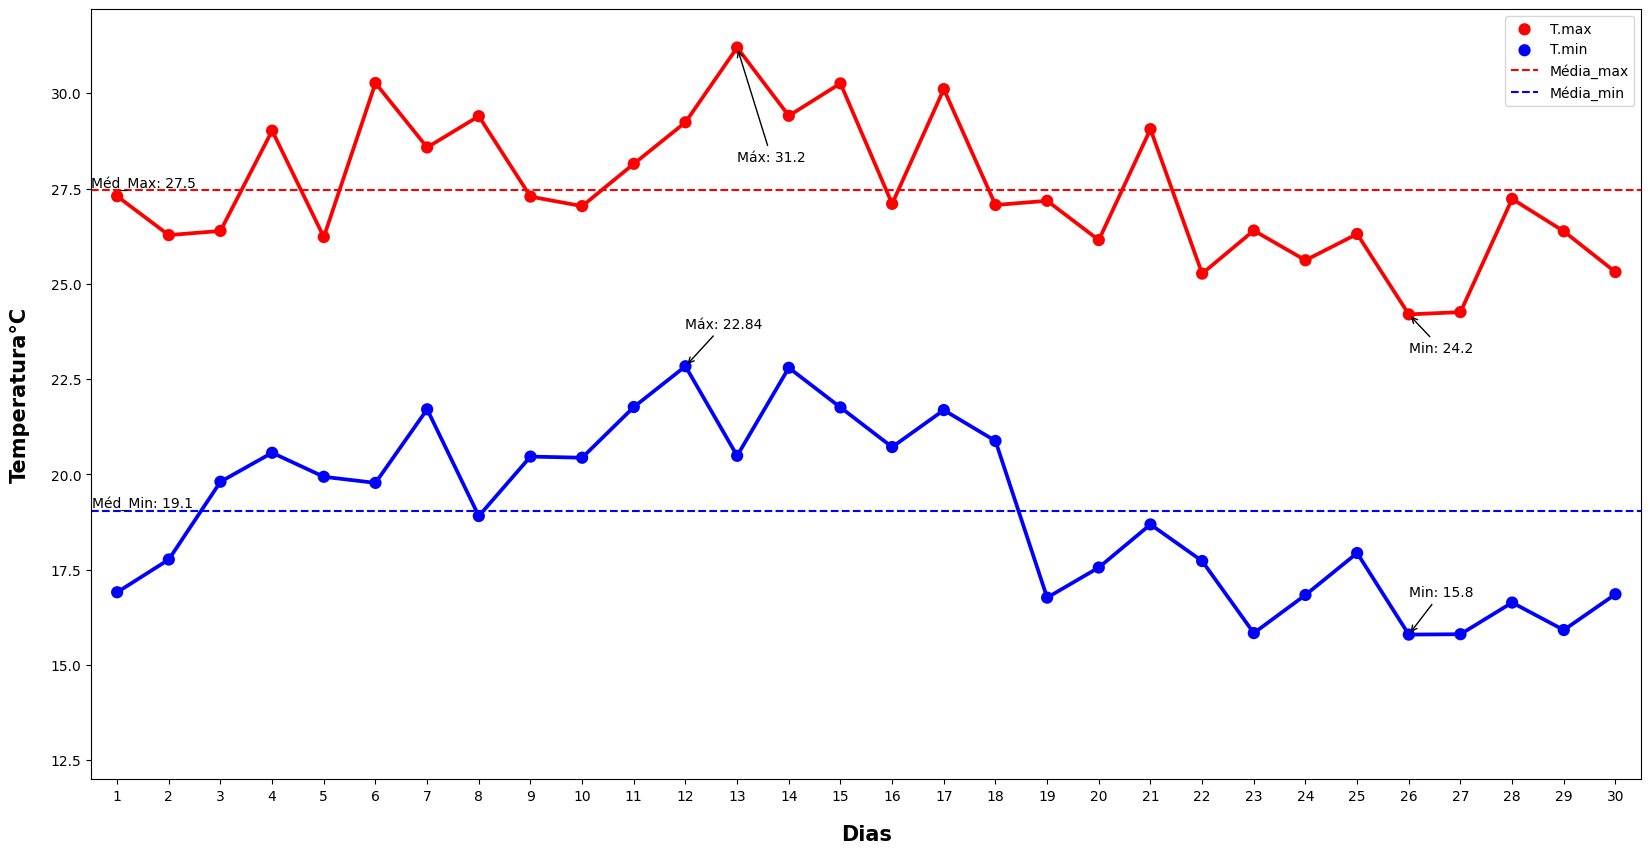

In [ ]:
media_max = df_maxtemp['temperatura'].mean()
media_min = df_mintemp['temperatura'].mean()
max_index_max = df_maxtemp['temperatura'].idxmax()
min_index_max = df_maxtemp['temperatura'].idxmin()
max_index_min = df_mintemp['temperatura'].idxmax()
min_index_min = df_mintemp['temperatura'].idxmin()
plt.figure(figsize=(20,10))
sns.pointplot(x='data', y='temperatura', data=df_maxtemp, color='red', label="T.max")
sns.pointplot(x='data', y='temperatura', data=df_mintemp, color='blue',label="T.min")
plt.axhline(media_max, linestyle='--', color='red', label='Média_max')
plt.axhline(media_min, linestyle='--', color='blue', label='Média_min')
plt.text(0.5, media_max, f'Méd_Max: {media_max:.1f}', color='black', ha='center',va='bottom')
plt.text(0.5, media_min, f'Méd_Min: {media_min:.1f}', color='black', ha='center',va='bottom')
plt.annotate(f'Máx: {df_maxtemp.loc[max_index_max, "temperatura"]}', xy=(max_index_max, df_maxtemp.loc[max_index_max, "temperatura"]),
             xytext=(max_index_max, df_maxtemp.loc[max_index_max, "temperatura"] - 3),
             arrowprops=dict(arrowstyle='->'))
plt.annotate(f'Min: {df_maxtemp.loc[min_index_max, "temperatura"]}', xy=(min_index_max, df_maxtemp.loc[min_index_max, "temperatura"]),
             xytext=(min_index_max, df_maxtemp.loc[min_index_max, "temperatura"] - 1),
             arrowprops=dict(arrowstyle='->'))
plt.annotate(f'Máx: {df_mintemp.loc[max_index_min, "temperatura"]}', xy=(max_index_min, df_mintemp.loc[max_index_min, "temperatura"]),
             xytext=(max_index_min, df_mintemp.loc[max_index_min, "temperatura"] + 1),
             arrowprops=dict(arrowstyle='->'))
plt.annotate(f'Min: {df_mintemp.loc[min_index_min, "temperatura"]}', xy=(min_index_min, df_mintemp.loc[min_index_min, "temperatura"]),
             xytext=(min_index_min, df_mintemp.loc[min_index_min, "temperatura"] + 1),
             arrowprops=dict(arrowstyle='->'))
plt.ylim(12, max(df_maxtemp['temperatura']) + 1)
plt.legend()
plt.xlabel("Dias",labelpad=15, fontsize=15, fontweight='bold')
plt.ylabel('Temperatura°C',labelpad=15, fontsize=15, fontweight='bold')
plt.show()